# Author: Erik Davino Vincent

# iFood - Data Analysis Case

Key Objectives:

$\bullet$ Explore the data. Provide insights, define cause and effect. Provide a better understanding
of the characteristic features of respondents;

$\bullet$ Propose and describe a customer segmentation based on customers behaviors;

$\bullet$ Create a predictive model which allows the company to maximize the profit of the next
marketing campaign.

# Mock Case

The objective of the team is to build a predictive model that will produce the highest profit for the
next direct marketing campaign, scheduled for the next month. The new campaign, sixth, aims at
selling a new gadget to the Customer Database. To build the model, a pilot campaign involving
2.240 customers was carried out. The customers were selected at random and contacted by phone
regarding the acquisition of the gadget. During the following months, customers who bought the
offer were properly labeled. The total cost of the sample campaign was 6.720MU and the revenue
generated by the customers who accepted the offer was 3.674MU. Globally the campaign had a
profit of -3.046MU. The success rate of the campaign was 15%. The objective is of the team is
to develop a model that predicts customer behavior and to apply it to the rest of the customer
base. Hopefully the model will allow the company to cherry pick the customers that are most likely
to purchase the offer while leaving out the non-respondents, making the next campaign highly
profitable. Moreover, other than maximizing the profit of the campaign, the CMO is interested in
understanding to study the characteristic features of those customers who are willing to buy the
gadget.

# Importing Libraries

We will be importing the Python libraries below. Numpy can be used for mathematical operations and transformations. We will be using Pandas to import and manipulate data. Matplotlib and Seaborn are powerfull graphing tools that will help to give a better understanding of the dataset vizualy, with hope of getting better insights.

In [1]:
# Importing the libraries that will be used for this analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import ttest_ind

# SkLearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier

# Utilities
import winsound
import warnings
from IPython.display import Image

# 1. Vizualizing the dataset

In [2]:
# Importing and vizulizing the dataset with Pandas.

data = pd.read_csv('ml_project1_data.csv')

# The code bellow lets us see more columns at once in our dataframe
pd.set_option('display.max_columns', None)

# Calls the first 20 rows of the dataset
data.iloc()[:20]

,CODE_ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,41156,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,41706,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,41507,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,41680,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,41658,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,41526,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,41226,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,41402,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,41431,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,41711,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


Notice that the 'Dt_Customer' column has already been altered, changing from a datetime format like 'mm/dd/yyyy' to an integer value. This change was made in Excel, prior to the running this notebook.

The first thing we can notice about this dataset is that there are some missing (NaN) values in the Income column. There are also weird Marital_Status categories, such as 'Together' (Together is not an official status) - there is also 'YOLO' status, which is very weird. In the Year_Birth column there are some unlikely values that are bellow 1900.

CODE_ID, Z_CostContact and Z_Revenue don't have any value for the analysis of the dataset - they don't give any isight on user behavior.

These columns will be needing some treatment, so that we can make a better analysis. For that, consider the following preprocessing function:

In [3]:
def preprocess(data):

    # Ignores user ID column, it does not serve any purpose in this analysis,
    # aswell as Z_CostContact and Z_Revenue.
    data.pop('CODE_ID')
    data.pop('Z_CostContact')
    data.pop('Z_Revenue')

    # Date data from Dt_Customer was converted to integer manually (via Excel editor)

    # Preprocess income - fill in blanks with mean yearly income of the dataset.
    # Considering not many people have this value as blank, there should be little
    # problem.
    # You can see in section 2.3 that there must be an upper bound to the income, because
    # of too big outliers.
    data['Income'] = data['Income'].replace(np.nan, data['Income'].mean())
    
    # This code snippet was added after analysing data on section 2.3
    warnings.filterwarnings('ignore')
    data['Income'][data['Income'] >= 250000] = 250000
    warnings.filterwarnings('default')


    # Year_Birth is clipped at 1920
    warnings.filterwarnings('ignore')
    data['Year_Birth'][data['Year_Birth'] <= 1920] = 1920
    warnings.filterwarnings('default')

    # Removes YOLO (!?) marital status from table (substitutes it with single)
    # Substitutes Alone marital status with single
    # Substitutes Absurd marital status with married
    # Substitutes Together marital status with married
    data['Marital_Status'] = data['Marital_Status'].replace('YOLO', 'Single')
    data['Marital_Status'] = data['Marital_Status'].replace('Alone', 'Single')
    data['Marital_Status'] = data['Marital_Status'].replace('Absurd', 'Married')
    data['Marital_Status'] = data['Marital_Status'].replace('Together', 'Married')

    return data

We believe the function above is self explanatory, but let us take note on some of the decisions made.

$\bullet$ YOLO and Alone status were replaced with Single. We make a safe bet that Alone is the same as Single. YOLO does not fit with any other category, so we decided to just replace it with single.

$\bullet$ Absurd and Together status have been replaced with Married. We can make a safe bet that Together is the same as Married. Absurd could also mean married, if we consider that the user interpreted the Marital_Status as the way their marriage has been going.

$\bullet$ The missing values in the Income column were replaced with the mean of all incomes. This works well, assuming that the mean is a good representation of the user base's income.

Lets see how the dataset looks like now:

In [4]:
data = preprocess(data)
data.iloc()[:20]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.000000,0,0,41156,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.000000,1,1,41706,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Married,71613.000000,0,0,41507,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Married,26646.000000,1,0,41680,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.000000,1,0,41658,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
5,1967,Master,Married,62513.000000,0,1,41526,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0
6,1971,Graduation,Divorced,55635.000000,0,1,41226,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0
7,1985,PhD,Married,33454.000000,1,0,41402,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0
8,1974,PhD,Married,30351.000000,1,0,41431,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1
9,1950,PhD,Married,5648.000000,1,1,41711,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0


# 2. Initial Analysis - Summary Information

We can do a simple analysis of the dataset with the summary data, to get a more general sense on the user base caracteristics.

There are three types of data in the dataframe: Numeric, categorical and binary data. These will be better analysed separately from one another, since they have different natures (e.g. Categorical data doesn't have a mean, but numeric data does).

In [5]:
# Separates data into different types of data

categorical_data = data[['Education', 'Marital_Status']]
binary_data = data[['Complain', 'AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].astype(bool)
numeric_data = data[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
                'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds',
                'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                'NumWebVisitsMonth']]

# 2.1. Categorical data analysis

In [6]:
categorical_data.describe()

,Education,Marital_Status
count,2240,2240
unique,5,4
top,Graduation,Married
freq,1127,1446


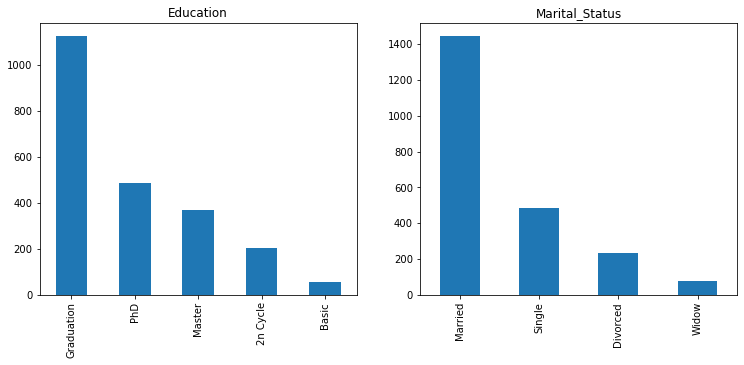

In [7]:
# Plots categorical data
fig, ax = plt.subplots(1, 2, figsize = (12.5,5))

categorical_data['Education'].value_counts().plot(kind='bar', ax = ax[0])
ax[0].set_title('Education')

categorical_data['Marital_Status'].value_counts().plot(kind='bar', ax = ax[1])
ax[1].set_title('Marital_Status')

plt.show()


# 2.2. Binary data analysis

In [8]:
binary_data.describe()

,Complain,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
count,2240,2240,2240,2240,2240,2240
unique,2,2,2,2,2,2
top,False,False,False,False,False,False
freq,2219,2096,2210,2077,2073,2077


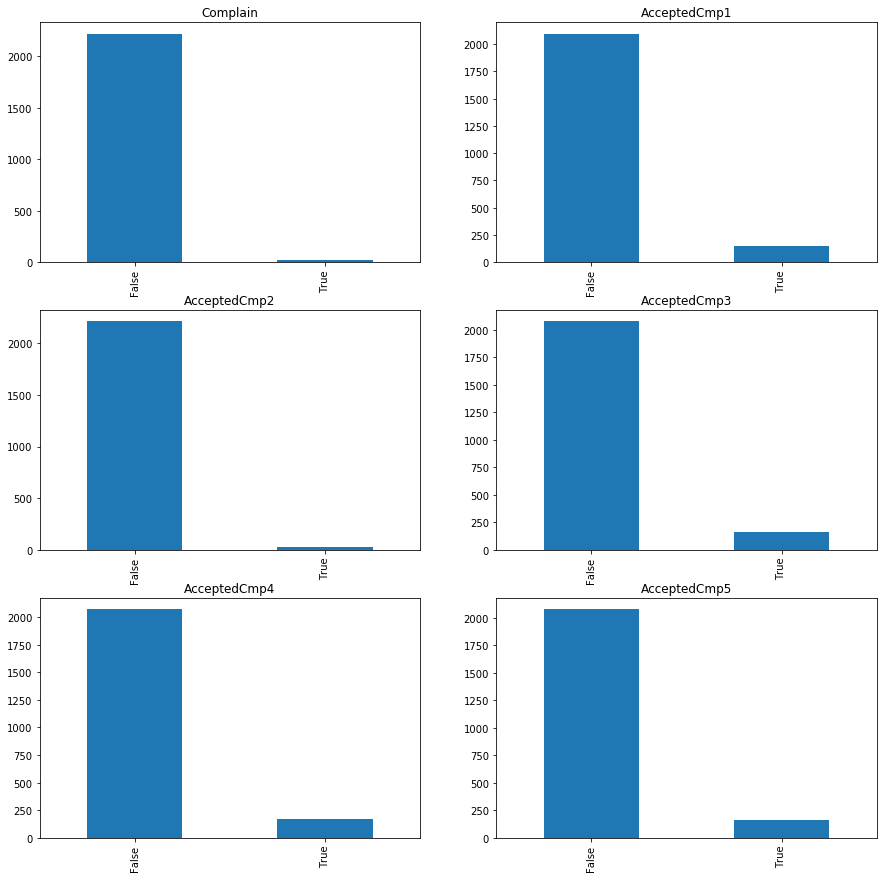

In [9]:
# Plots binary data
fig, ax = plt.subplots(3,2, figsize = (15,15))

binary_data['Complain'].value_counts().plot(kind='bar', ax = ax[0,0])
ax[0,0].set_title('Complain')
binary_data['AcceptedCmp1'].value_counts().plot(kind='bar', ax = ax[0, 1])
ax[0,1].set_title('AcceptedCmp1')
binary_data['AcceptedCmp2'].value_counts().plot(kind='bar', ax = ax[1, 0])
ax[1,0].set_title('AcceptedCmp2')
binary_data['AcceptedCmp3'].value_counts().plot(kind='bar', ax = ax[1, 1])
ax[1,1].set_title('AcceptedCmp3')
binary_data['AcceptedCmp4'].value_counts().plot(kind='bar', ax = ax[2, 0])
ax[2,0].set_title('AcceptedCmp4')
binary_data['AcceptedCmp5'].value_counts().plot(kind='bar', ax = ax[2, 1])
ax[2,1].set_title('AcceptedCmp5')

plt.show()

# 2.3. Numeric data analysis

In [10]:
numeric_data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.836161,52061.239747,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,11.830100,21810.911769,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,1920.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,250000.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


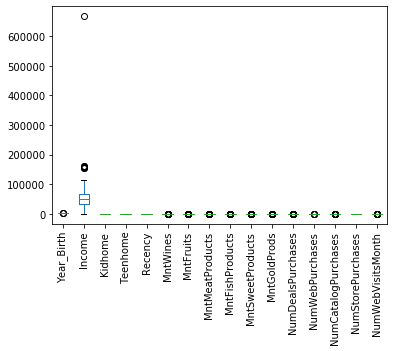

In [11]:
# Box plot without upper bound
Image(filename='BOX_PLOT_NUMERIC1.png') 

From the boxplot above, we can see that there is one more thing we have to do for the preprocessing, which is removing too extreme outliers, like the one in income, of value 666666.

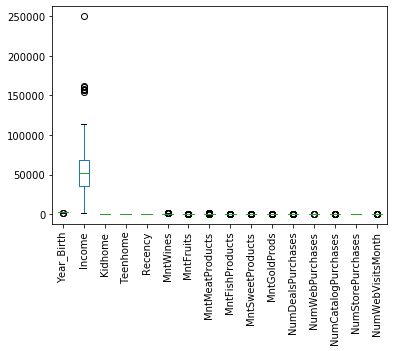

In [12]:
# Numeric box plots with upper bound
numeric_data.plot(kind = 'box', rot = 90)

The image above is a little bit better, but we can get a better vizualization of the plot, by creating individual box plots.

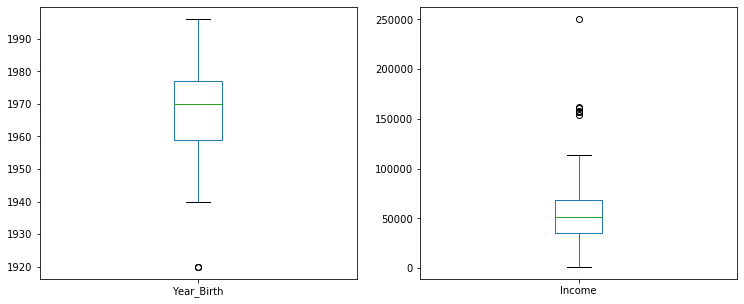

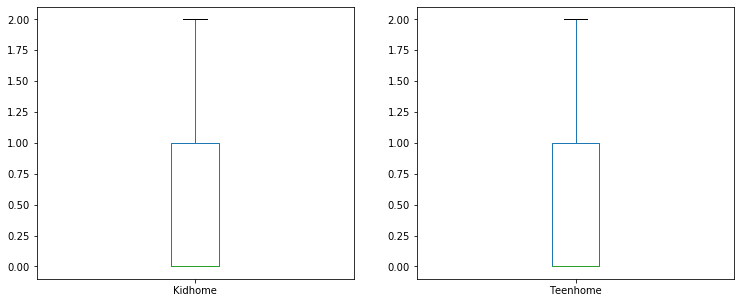

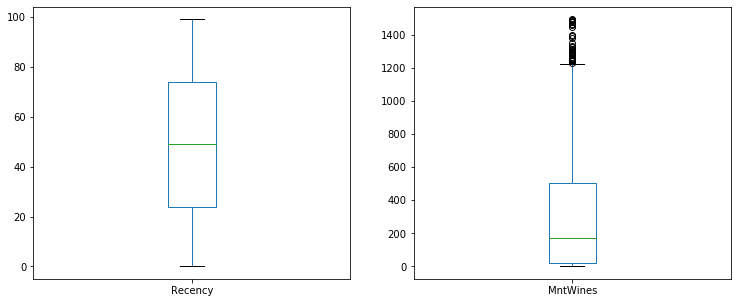

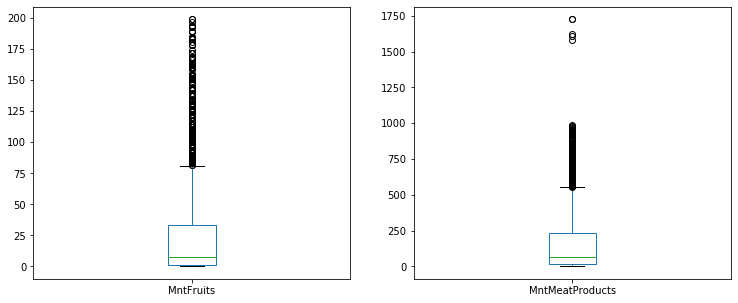

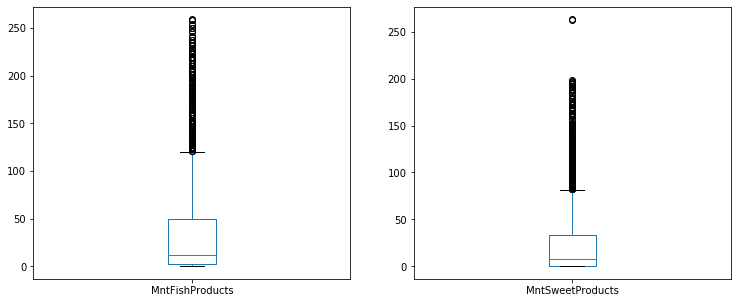

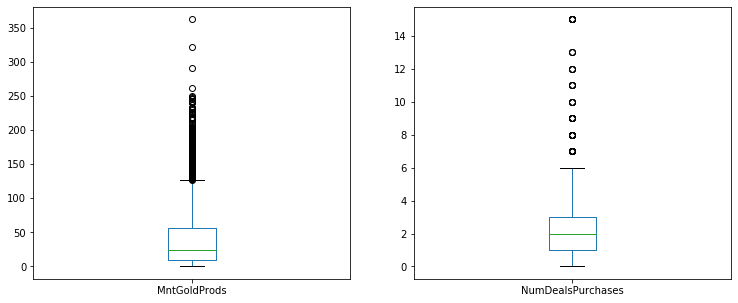

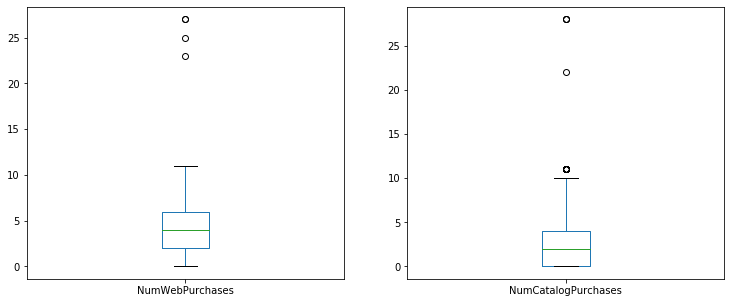

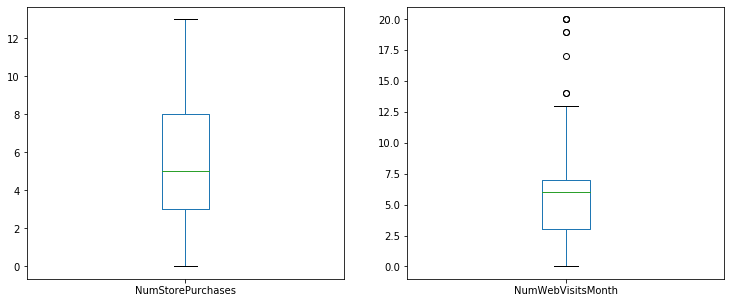

In [13]:
# Plots numeric data box plots
i = 0
fig, ax = plt.subplots(1, 2, figsize = (12.5,5))
for column in numeric_data:
    if i > 1:
        i = 0
        fig, ax = plt.subplots(1, 2, figsize = (12.5,5))
        
    
    numeric_data[column].plot(kind = 'box', ax = ax[i])
    i += 1

These box plots shows us that there are many outliers in the features related to buying amounts; there are some people who buy way more than the other users. The Income feature also has some outliers, which was to be expected, since, the wealth distribution in Brazil (and most countries) is very unequal.

It was also to be expected that the amount spent on meat and wine products would be larger overall, since these kinds of products are more often than not really expensive.

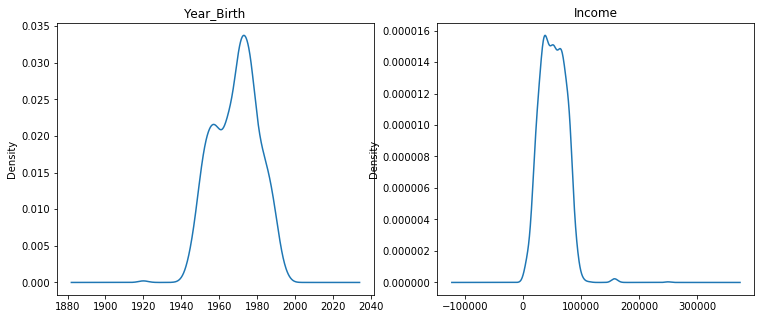

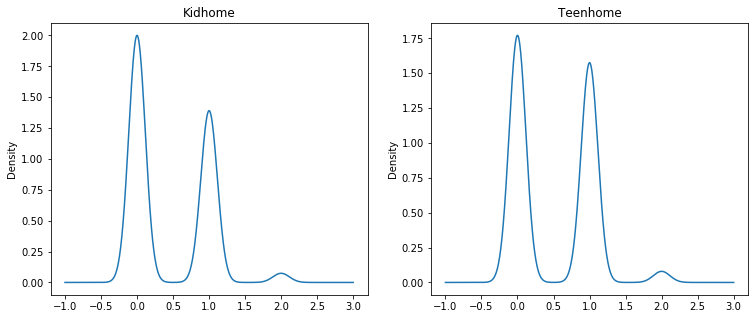

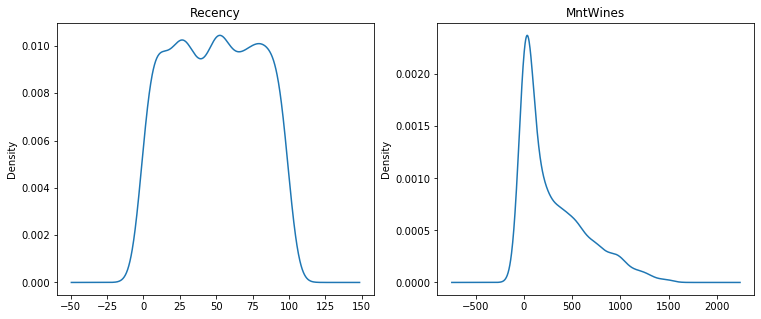

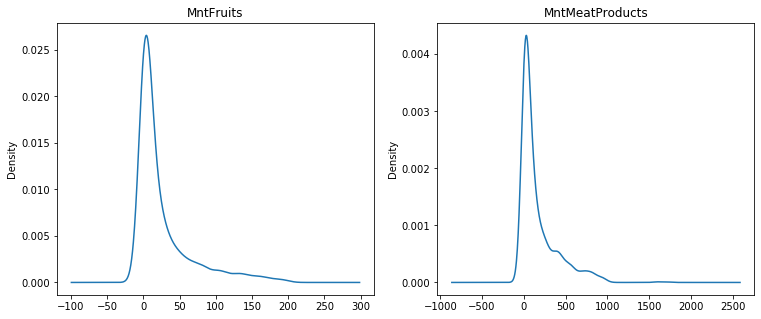

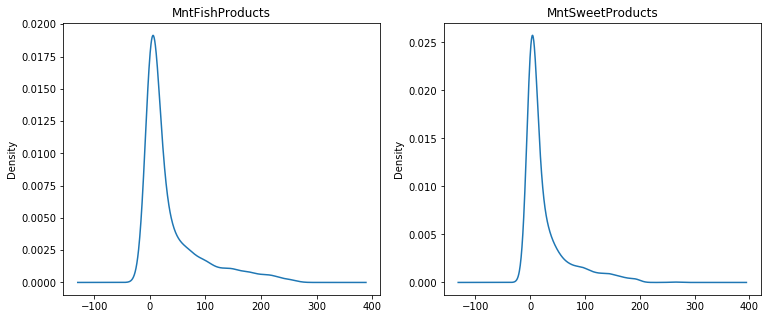

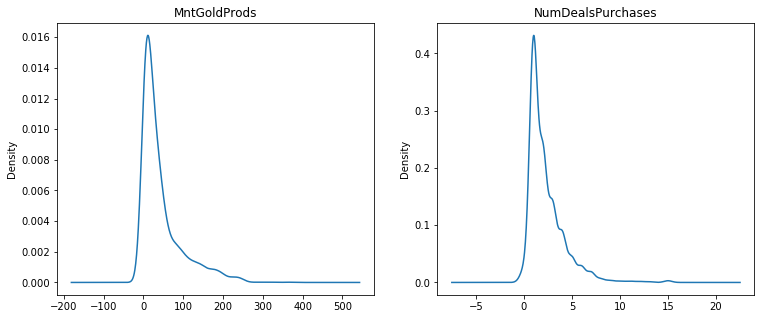

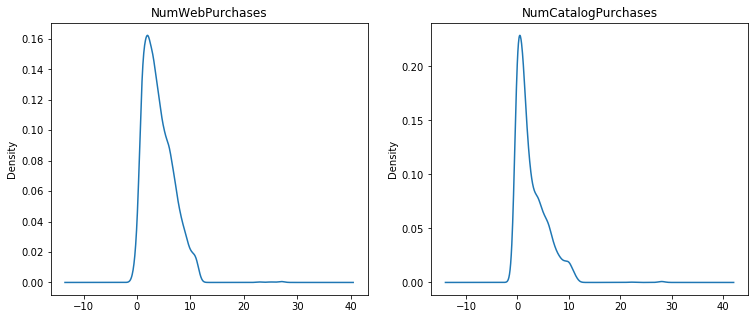

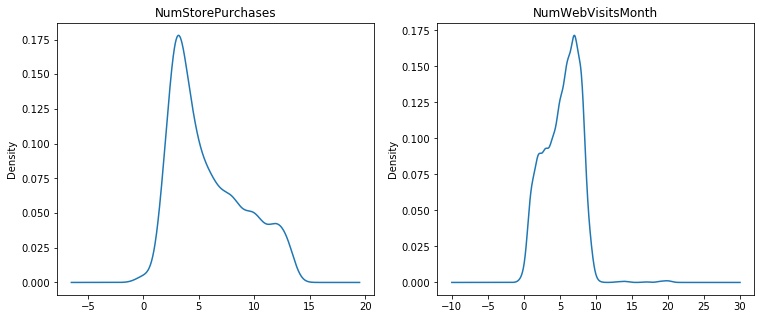

In [14]:
# Plots numeric data densities
i = 0
fig, ax = plt.subplots(1, 2, figsize = (12.5,5))
for column in numeric_data:
    if i > 1:
        i = 0
        fig, ax = plt.subplots(1, 2, figsize = (12.5,5))
        
    
    numeric_data[column].plot(kind = 'density', ax = ax[i])
    ax[i].set_title(f'{column}')
    i += 1

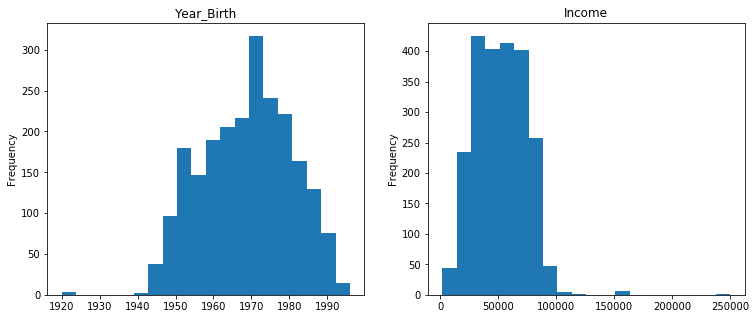

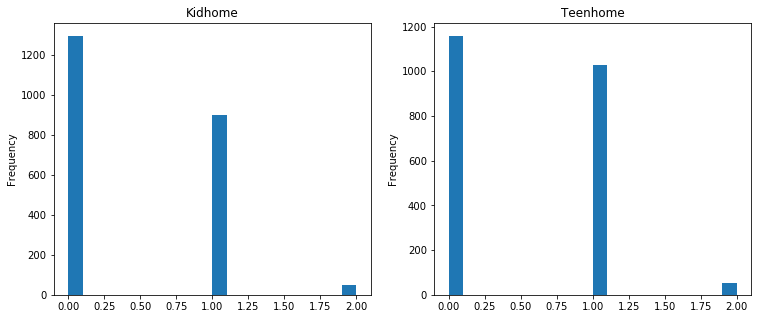

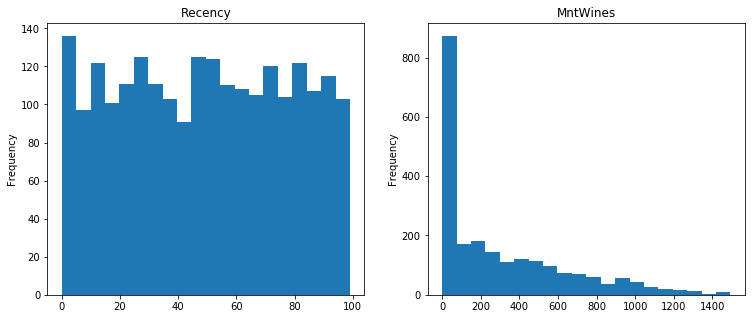

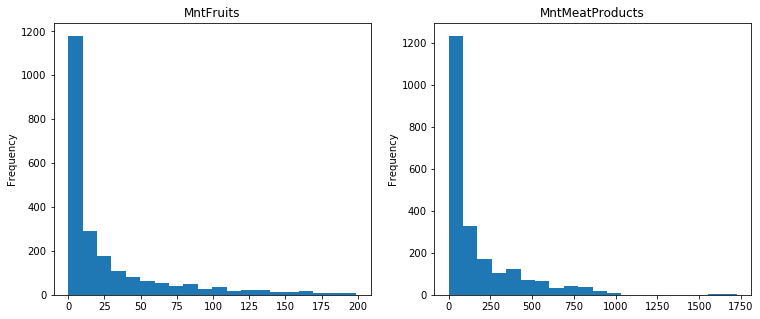

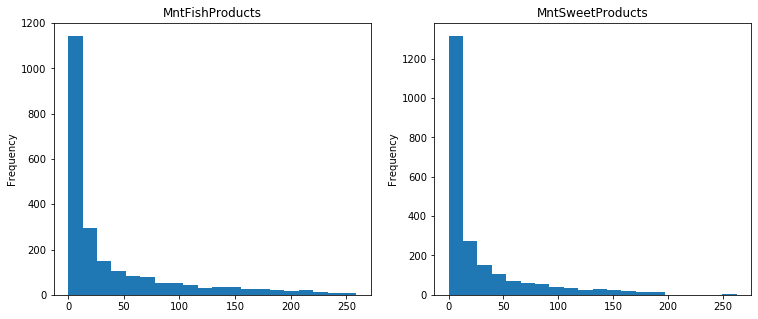

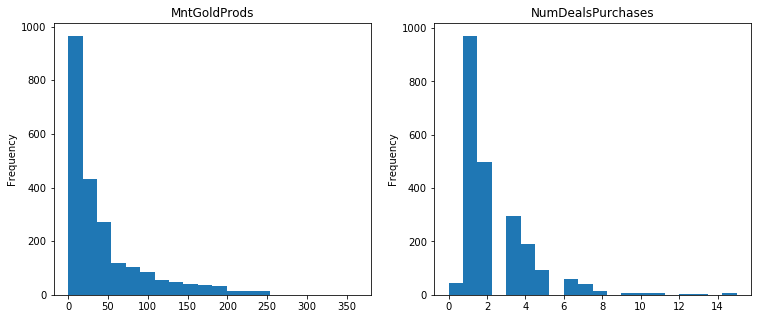

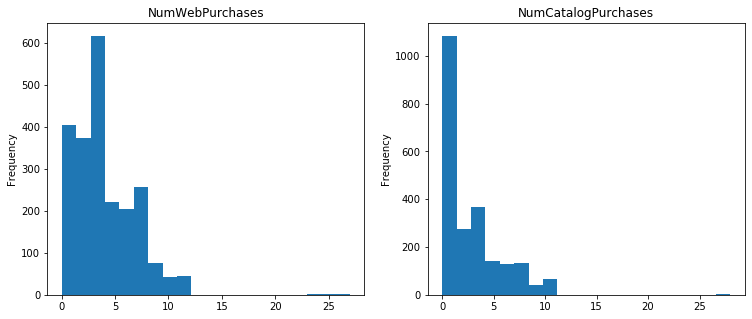

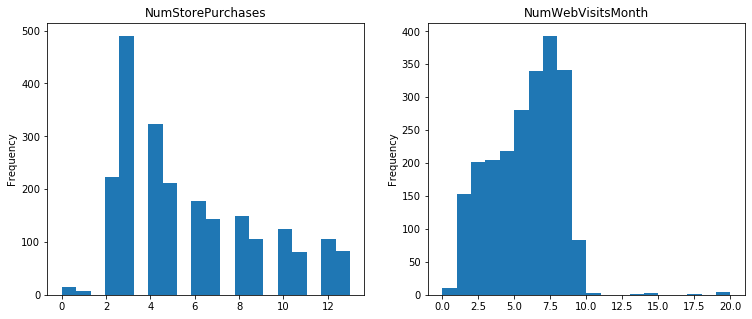

In [15]:
# Plots numeric data frequencies
i = 0
fig, ax = plt.subplots(1, 2, figsize = (12.5,5))
for column in numeric_data:
    if i > 1:
        i = 0
        fig, ax = plt.subplots(1, 2, figsize = (12.5,5))
        
    
    numeric_data[column].plot(kind = 'hist', ax = ax[i], bins = 20)
    ax[i].set_title(f'{column}')
    i += 1

The values presented in the graphs above suggest that the majority of users has a lower income and don't spend a lot with the company's services. We can also see that the user base is rather old (40 tp 50 years old), while there also is considerably younger users, who should be around their thirties now. This older user base could be one of the reasons for there not being many web visits and web purchases, compared to the other purchasing methods.

Now, lets see how different are the graphs above based on the different responses to the campaign

# 3. Analysis for different responses

In [16]:
categorical_data = data[['Education', 'Marital_Status', 'Response']].groupby(['Response'])
binary_data = data[['Complain', 'AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                    'AcceptedCmp5', 'Response']].astype(bool).groupby(['Response'])
numeric_data = data[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
                'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds',
                'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                'NumWebVisitsMonth', 'Response']].groupby(['Response'])

# 3.1. Categorical data response analysis

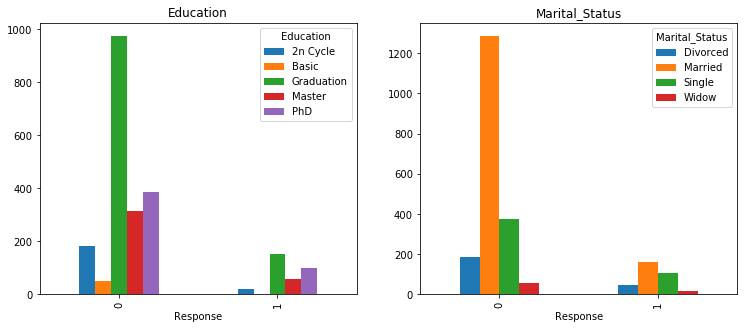

In [17]:
# Plots categorical data
fig, ax = plt.subplots(1, 2, figsize = (12.5,5))

categorical_data['Education'].value_counts().unstack().plot(kind='bar', ax = ax[0])
ax[0].set_title('Education')

categorical_data['Marital_Status'].value_counts().unstack().plot(kind='bar', ax = ax[1])
ax[1].set_title('Marital_Status')

plt.show()

The Education graph above suggests that the user's level of education does not have so much influence in the response, since the proportions from the negative responses and the positive responses are roughly the same;

It would seem that married people are less likely to say yes to the campaign, though, since the proportions are very different.

# 3.2. Binary data response analysis

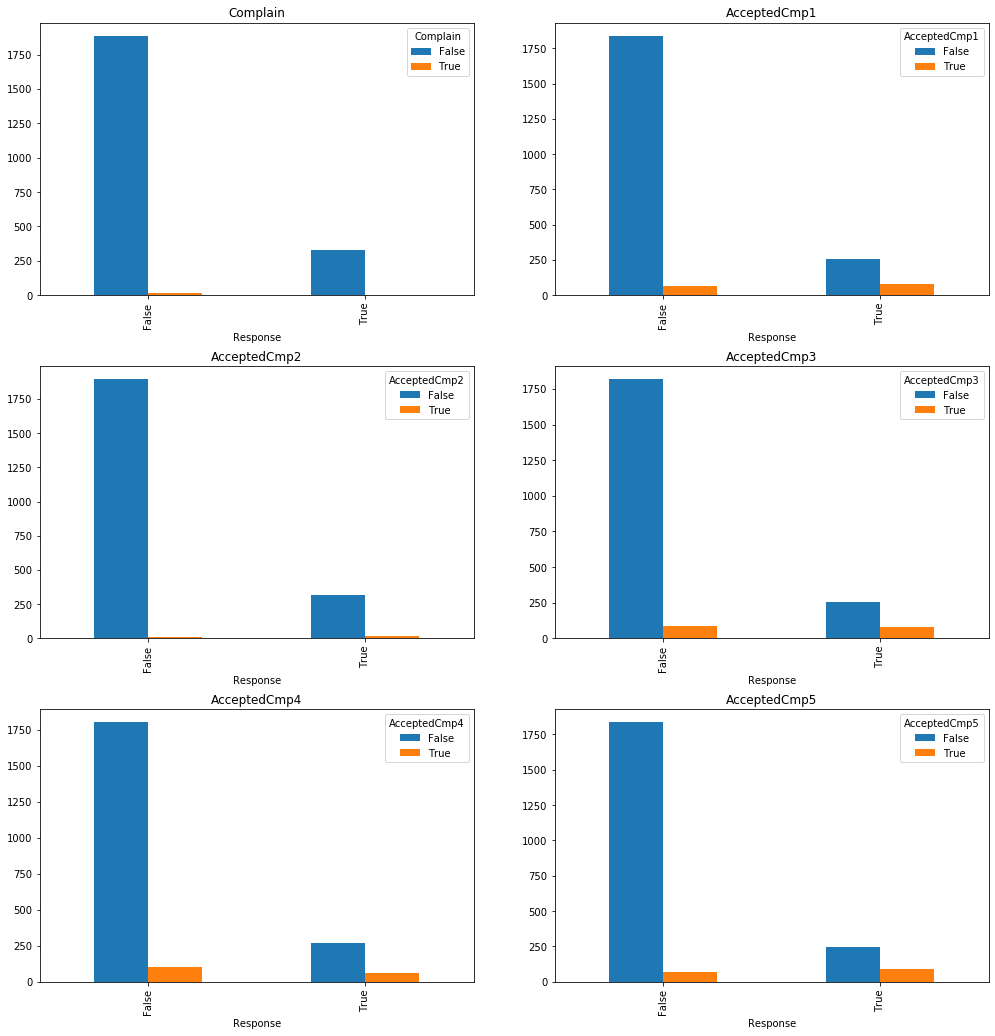

In [18]:
# Plots binary data
fig, ax = plt.subplots(3,2, figsize = (15,15))
fig.tight_layout(pad = 5)

binary_data['Complain'].value_counts().unstack().plot(kind='bar', ax = ax[0,0])
ax[0,0].set_title('Complain')
binary_data['AcceptedCmp1'].value_counts().unstack().plot(kind='bar', ax = ax[0, 1])
ax[0,1].set_title('AcceptedCmp1')
binary_data['AcceptedCmp2'].value_counts().unstack().plot(kind='bar', ax = ax[1, 0])
ax[1,0].set_title('AcceptedCmp2')
binary_data['AcceptedCmp3'].value_counts().unstack().plot(kind='bar', ax = ax[1, 1])
ax[1,1].set_title('AcceptedCmp3')
binary_data['AcceptedCmp4'].value_counts().unstack().plot(kind='bar', ax = ax[2, 0])
ax[2,0].set_title('AcceptedCmp4')
binary_data['AcceptedCmp5'].value_counts().unstack().plot(kind='bar', ax = ax[2, 1])
ax[2,1].set_title('AcceptedCmp5')

plt.show()

From these graphs above, it would be safe to suggest that having previously complained is not a decisive indicator that a user will accept or reject the campaign; however, given difference in proportions of positive and negative responses to the previous campaigns for those who had a negative response to the current campaign and difference of these proportions for those who had a positive response to the current campaign, it would be safe to assume that users who have accepted previous campaign offers are more likely to accept a new one.

# 3.3. Numeric data response analysis

In [19]:
numeric_data.describe()

Year_Birth                                                          \
              count         mean        std     min     25%     50%     75%   
Response                                                                      
0            1906.0  1968.734523  11.728147  1920.0  1959.0  1970.0  1977.0   
1             334.0  1969.416168  12.398192  1943.0  1959.0  1971.0  1979.0   

                  Income                                                \
             max   count          mean           std     min       25%   
Response                                                                 
0         1996.0  1906.0  50637.517199  21253.990258  1730.0  34560.00   
1         1996.0   334.0  60185.836082  23163.326663  7500.0  39786.75   

                                     Kidhome                                \
              50%      75%       max   count      mean       std  min  25%   
Response                                                                     
0         50567.0  65937.5  250000.0  1906.0  0.462225  0.544975  0.0  0.0   
1         64044.0  80477.0  105471.0   334.0  0.341317  0.487347  0.0  0.0   

                        Teenhome                                               \
          50%  75%  max    count      mean       std  min  25%  50%  75%  max   
Response                                                                        
0         0.0  1.0  2.0   1906.0  0.541448  0.545670  0.0  0.0  1.0  1.0  2.0   
1         0.0  1.0  2.0    334.0  0.305389  0.492741  0.0  0.0  0.0  1.0  2.0   

         Recency                                                    MntWines  \
           count       mean        std  min   25%   50%   75%   max    count   
Response                                                                       
0         1906.0  51.514690  28.519092  0.0  27.0  52.0  77.0  99.0   1906.0   
1          334.0  35.383234  27.659499  0.0  11.0  30.0  56.0  99.0    334.0   

                                                                    MntFruits  \
                mean         std  min    25%    50%     75%     max     count   
Response                                                                        
0         269.104407  305.159188  0.0  21.25  152.0  443.75  1493.0    1906.0   
1         502.703593  427.183786  1.0  96.00  448.0  875.50  1492.0     334.0   

                                                             MntMeatProducts  \
               mean        std  min  25%   50%    75%    max           count   
Response                                                                       
0         24.216684  38.191763  0.0  1.0   7.0  28.00  199.0          1906.0   
1         38.203593  46.099519  0.0  4.0  21.0  53.75  193.0           334.0   

                                                                     \
                mean         std  min    25%    50%     75%     max   
Response                                                              
0         144.624344  205.299936  0.0  14.00   56.0  192.75  1725.0   
1         294.353293  286.890036  1.0  47.75  174.5  509.75   981.0   

         MntFishProducts                                                      \
                   count       mean        std  min  25%   50%    75%    max   
Response                                                                       
0                 1906.0  34.980063  52.870253  0.0  2.0  11.0  43.00  259.0   
1                  334.0  52.050898  61.855885  0.0  4.0  25.0  84.25  250.0   

         MntSweetProducts                                                     \
                    count       mean        std  min  25%   50%   75%    max   
Response                                                                       
0                  1906.0  25.035152  40.001067  0.0  1.0   7.0  30.0  263.0   
1                   334.0  38.634731  46.327903  0.0  3.0  20.0  57.0  198.0   

         MntGoldProds                                                       \
 

We could try to use the means of the different features given a certain response to determine some grouping pattern. But for that it's better to assure that they truly have different population mean values. This can be easly done with a t-test, which is a hypothesis test to verify that in fact two populations have a different mean, with some probability $\alpha$.

For these t-tests we will be using a value of $\alpha = 0.01$. We will also be assuming equal variance of the two groups

In [20]:
# Performs t-tests assuming equal variance (they come from the same distribution)
# Using a significance of 0.05
# H0: equal means
# H1: means are different
# If p-value > significance: Can't reject H0
# Else: p-value < significance; Rejects H0 => H1
t_test_results = []
data0 = data[data['Response'] == 0]
data1 = data[data['Response'] == 1]
for indx in ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
            'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
            'NumWebVisitsMonth']:

    t_test_info = ttest_ind(data0[indx], data1[indx])
    t_test_results.append(t_test_info[1] < 0.01)
    
pd.DataFrame([['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
            'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
            'NumWebVisitsMonth'], np.array([t_test_results]).T])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
1,[False],[True],[True],[True],[True],[True],[True],[True],[True],[True],[True],[False],[True],[True],[False],[False]


As we can see, the only numeric features which have different means are the ones that range from Income to MntGoldProds plus NumCatalogPurchases and NumStorePurchases. Knowing this we can make some assumptions about the positive and negative response groups:

$\bullet$ Users with higher income than the others are a bit more likely to accept the offer.

$\bullet$ Users who have less children are also more likely to accept the offer.

$\bullet$ Users who have a lower recency (they come back more often) are more likely to accept the offer. This could be because they buy more, or just because they have more oportunities to see the offers and then accept them.

$\bullet$ Users who buy a lot of products (does not matter what kind of products) are more likely to give a positive response. This could be related to recency, as stated above, but it could also be because they spend more money overall and are more prone to accept the offers.

$\bullet$ Users who use the catalog to make purchases more often are most likely to accept the offer. This may have something to do with where the offers are being announced.

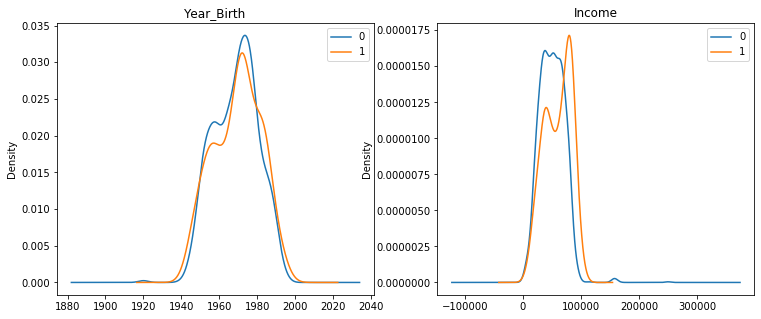

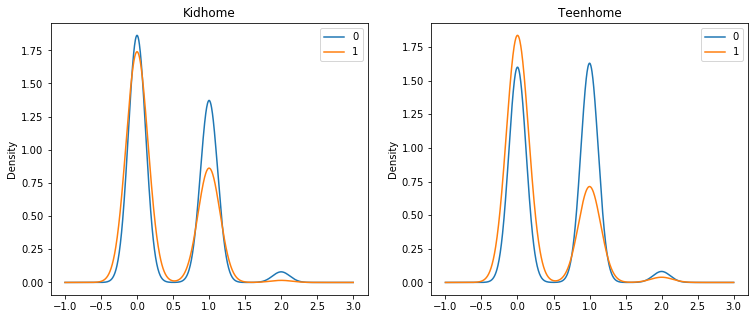

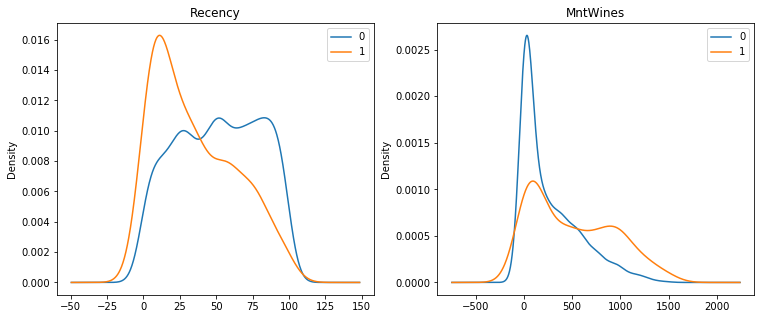

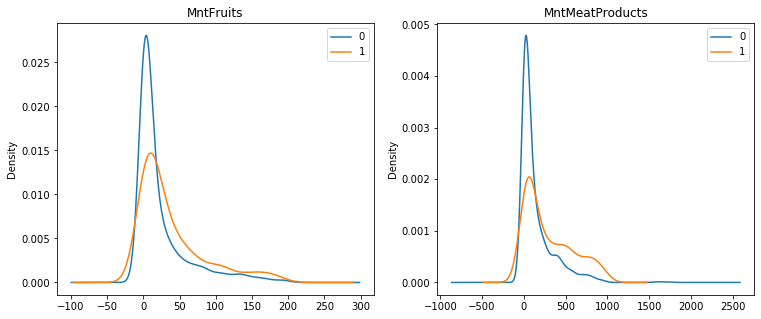

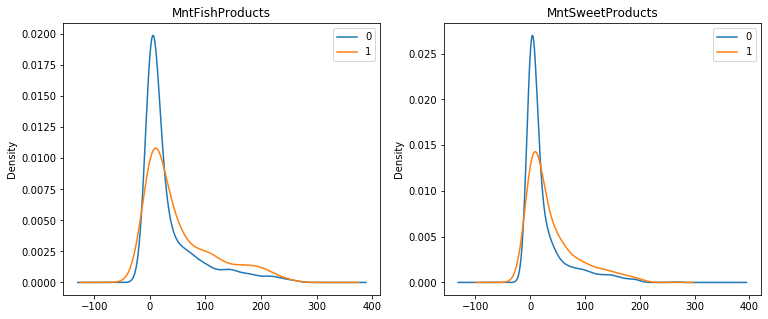

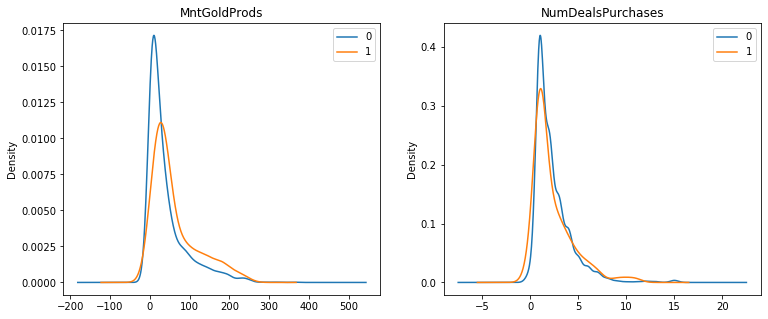

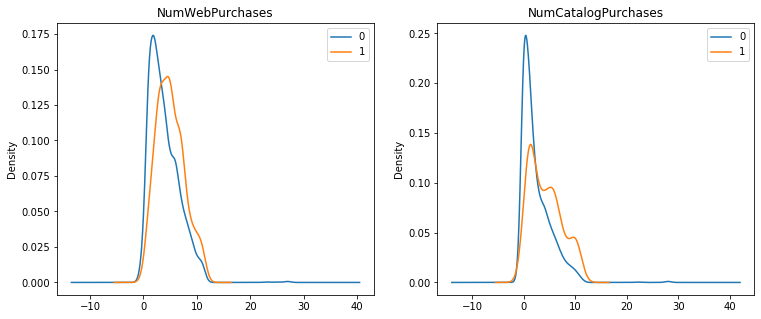

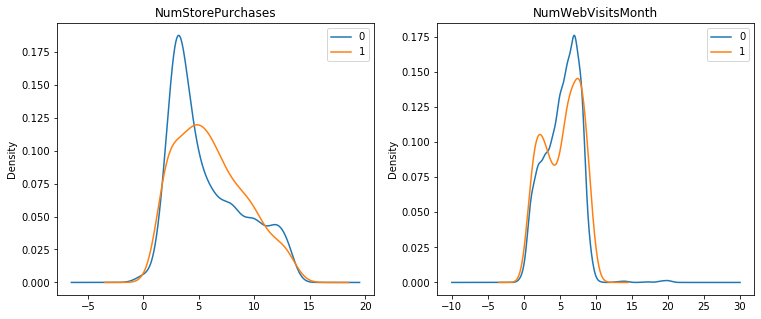

In [21]:
# Plots numeric data densities
i = 0
fig, ax = plt.subplots(1, 2, figsize = (12.5,5))
for column in ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
            'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
            'NumWebVisitsMonth']:
    if i > 1:
        i = 0
        fig, ax = plt.subplots(1, 2, figsize = (12.5,5))
        
    
    numeric_data[column].plot(kind = 'density', ax = ax[i], legend = True)
    ax[i].set_title(f'{column}')
    i += 1


The density histograms above serve to reinforce the assumptions/statements about the users made before, but also to give a perspective on how much difference there is between who had a positive response and who had a negative response, which isn't really all that much. At least it can give us a better aim on who should the next campaign target the most.

# 4. Correlation Matrix

Another graph that can give us some insight about the user behaviour is the pearson correlation matrix. Even though __correlation does not imply causation__, sometimes we can make good predictions about a groups behaviour based on the information the matrix gives us.

It is always good to remember: positive correlation between features means that when one feature is bigger, the other one is also bigger. Negative correlation between features means that when one feature is bigger, the other is smaller and vice-versa.

In [22]:
def correlation_analysis(data):

    corr_matx = data.corr()
    plt.figure('Correlation Matrix', figsize=(12, 12), dpi=150) 
    sn.heatmap(corr_matx, annot = True, cmap = 'RdBu_r', center = 0, annot_kws={"fontsize":6})
    plt.title('Correlation Matrix')
    plt.show()

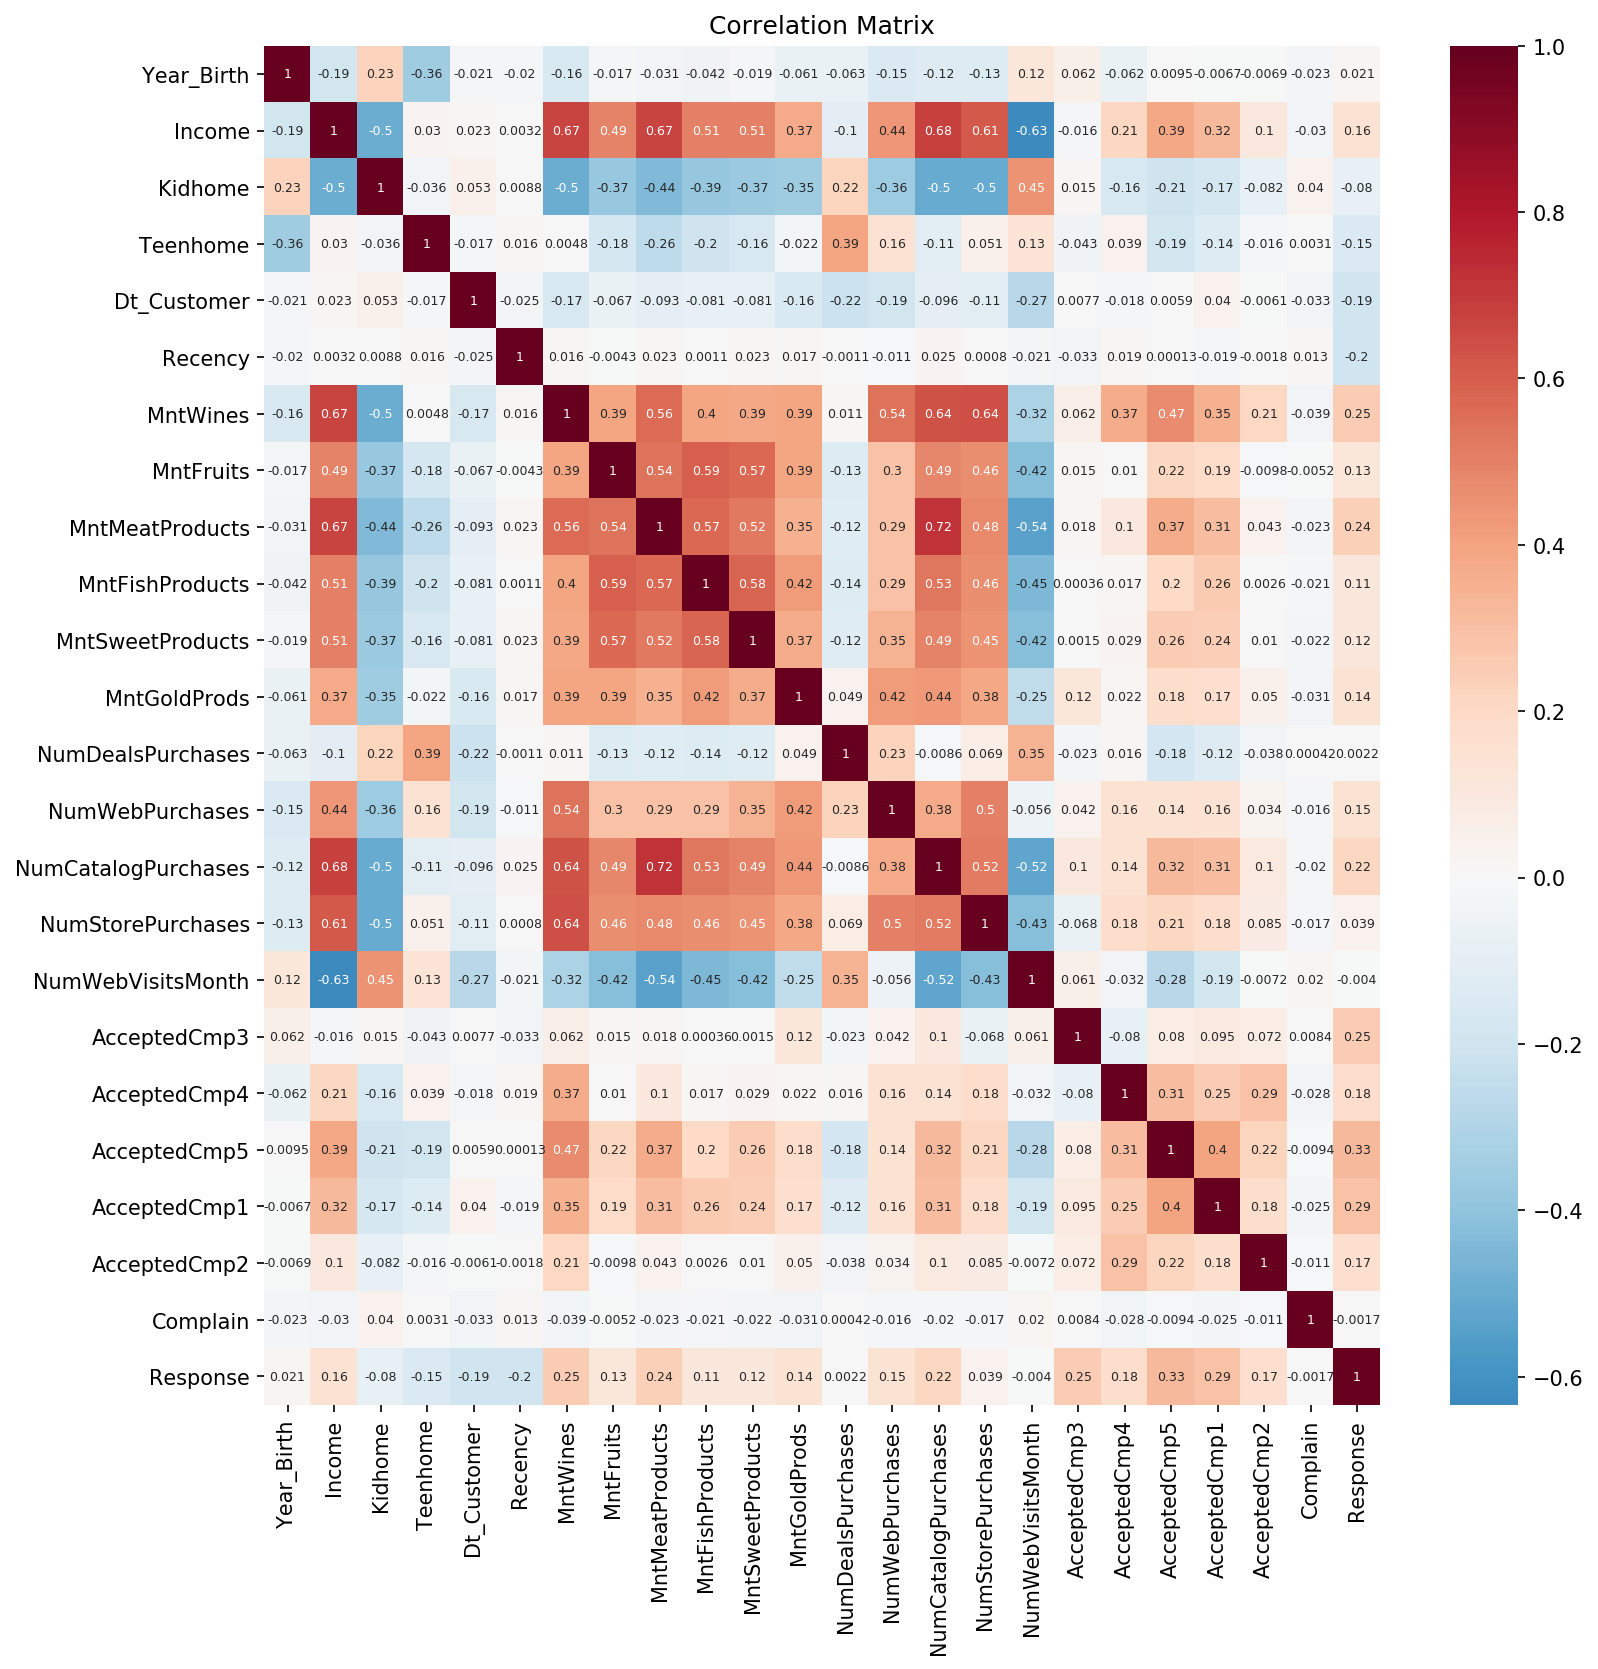

In [23]:
correlation_analysis(data)

# 4.1. Analysis of the correlation

From this correlation matrix we could try and make some assumptions.

For instance, we can see that the amount of wines and meats bought (which are usually more expensive products) has a high correlation with the user's income. It is rather safe to assume that this has a cause and effect relation, since people with more money can buy more expensive things and in bigger quantities. We can see that the correlation is high between the amount of products bought, doesn't matter what kind, with the income, which was to be expected aswell.

Some other assumptions we could try to make are:

$\bullet$ People with lower income have more kids home. This makes sense, considering two things: there is little correlation between income and having teenager home. This makes sense, since the user base's age is between 20 to about 70 years old, and most of them are somewhat older (in their forties or fifties). So, we could assume for example that older people are more likely to have teenagers home, but also small children. while younger people will most likely have a small child (if they have any). It is also to be expected that younger people will have a lower income (in fact, we can see that the more recent the year of birth is, the lower the income), since they are just starting their careers or are still undergrads.

$\bullet$ Another assumption that can be made on this correlation between income and number of kids home is the fact that usually poorer people have more children overall, due to lack of education and information. In Brazil, this is a reality.

$\bullet$ There is a positive correlation between having kids home or teenagers home and the number of web purchases. This could be implying that the kids or the teenagers are using the companies services with their parents accounts, since younger people are more used to using technology. Something similar can be said about year of birth and the number of web visits per month: younger people, who were born more recently are more engaged with web services and technology.

$\bullet$ The date the customer has subscripted to the company's services has a negative correlation to the number of web purchases. This could most likely mean that, since they have a more recent subscription, they haven't had a chance of using the web services as much as people who subscripted a longer time ago.

$\bullet$ There is an overall high correlation between purchase amounts of all kinds of products. This can be due to the fact that the people who buy a lot of one kind of product also buys a lot of all the other products at the same time. Most likely more wealthy users.

$\bullet$ The number of deals purchases has a high positive correlation with web vists per month. If the deals are announced mostly on the website of the company, this is the most probable cause for this correlation.

$\bullet$ There is a higher positive correlation between user income and catalog purchases and store purchases. It is likely that since wealthier users buy in larger quantities they prefer to go to the store and use the catalog. This could also be happening because there is a limited amount of products that can be bought with the webservice (like a total weight amount).

$\bullet$ The correlation pattern of having accepted any campaign offers are very similar with one another. We can point out some things in particular that might have great value:

$\ \ \ \ \ \ \ \ \bullet$ People who have accepted the previous campaign offers were most likely wealthier (higher income). They also bought more products overall (could be because they are wealthy or because the offers were good and made these users buy in larger quantities. Could it be that the offers were directed towards people who buy larger quantities?).

$\ \ \ \ \ \ \ \ \bullet$ There is a high correlation between accepting campaign offers. It is likely that there is a cause and effect relationship in this case. This can happen because these offers were always offered to the same kind of audience, or ir could be that some users are just more prone to accepting the them.

$\ \ \ \ \ \ \ \ \bullet$ The current campaign offer response has practically the same correlation pattern as the previous campaign offers. That is: high income users, big purchase amounts, have accepted previous offers. This suggests that there might be a fixed user base which are more likely to accept the offers. There is a subtle difference between this campaign and the previous ones, that being that this time there is a negative correlation between recency and accepting the offer. This suggests that users who use the compay's services more often might be more likely to see that there is an offer, and then proceed to accepting it. 

# 4.2 User base group segmentation

From the analysis made so far, especially the correlation one, we could try to segment the user base into the following groups:

__A.__ High income users. They don't compose the majority of the user base, but they buy large amounts of products. They are more likely to buy luxury products (meats, wines, gold...). They are slightly older and don't have many young kids. They might have teenagers at home, though. They also don't use the webservices as often, preferring to go to the store or using the catalog.

__B.__ Low income users who are at the start of their careers or are still undergraduation. They are more likely to use the webservices, since they have more familiarity with technology. Since they have a low income, and might be still living with their parents, they don't buy large amounts, especially luxury products.

__C.__ Low income users who have kids or teenagers at home. They can't buy large amounts of products since they don't have much money to spend. They are also not very familiar with the webservices and don't catch the deals.

__D.__ Users with medium income, who have kids or teenagers home. They have access to the webservice and it is likely that their children use the services aswell. They are more likely to catch deals and make web purchases, while still not buying large amounts.

__E.__ The trusty user base - users who have some trust in the company and will accept an offer again, because they liked the other ones they accepted before. They buy larger amounts, probably because they took the offers and were incentivized to purchase more. Some of them have higher income and spend a lot when shopping, which leads the to accept the offers, with the objective of spending less when buying more.

# 4.2.1 User base segmentation using K-Means

K-means is a popular and simple clustering algorithm. It creates center points that define clusters based on the distance between the other points to it.

We could try to segment the user base with K-Means, to then see what are the specifics of each group that was found. But before doing that, first we have to encode and scale our data, so that it can be interpreted by the algorithm - and the ones which will soon follow.

In [24]:
def encode_scale(data):
    
    data_scl = data.copy()
    # Separates target labels from data
    target_labels = data_scl.pop('Response')

    # Preprocess scale - performs scalling
    scaler = StandardScaler()
    data_scl[['Year_Birth', 'Income', 'Dt_Customer', 'Recency', 'MntWines',
                'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                'NumWebVisitsMonth']] = scaler.fit_transform(data_scl[['Year_Birth', 'Income', 'Dt_Customer', 'Recency', 'MntWines',
                'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                'NumWebVisitsMonth']])

    # Performs One Hot Encoding on categorical data values
    encoded = pd.get_dummies(data_scl['Education'], prefix = 'Education', prefix_sep = '_')
    data_scl = pd.concat([data_scl, encoded], axis = 1)
    data_scl.pop('Education')
    encoded = pd.get_dummies(data_scl['Marital_Status'], prefix = 'Marital_Status', prefix_sep = '_')
    data_scl = pd.concat([data_scl, encoded], axis = 1)
    data_scl.pop('Marital_Status')

    return (data_scl, target_labels)

In [25]:
# Scale and encode data
data_scl, target_labels = encode_scale(data)

In [26]:
data_scl.iloc()[:20]

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
0,-1.000736,0.278673,0,0,-1.531185,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,-1.254383,-0.262186,1,1,1.190545,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,-0.324344,0.896621,0,0,0.205773,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,1.282088,-1.165514,1,0,1.061881,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1.028441,0.285781,1,0,0.953012,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
5,-0.155246,0.479306,0,1,0.299797,-1.143438,0.642051,0.394768,-0.305541,-0.687068,0.361924,-0.575619,-0.168236,0.689386,0.457817,1.295237,0.281720,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
6,0.182950,0.163889,0,1,-1.184783,-0.521805,-0.204847,0.973172,-0.013072,0.228401,0.531533,-0.326366,0.867064,1.049345,0.115638,0.372226,0.281720,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
7,1.366637,-0.853307,1,0,-0.313830,-0.590875,-0.677327,-0.409969,-0.491658,-0.632140,-0.631503,-0.403059,-0.168236,-0.030532,-0.910898,-0.550785,1.106087,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
8,0.436598,-0.995607,1,0,-0.170320,-1.039832,-0.861565,-0.661449,-0.633461,-0.632140,-0.583043,-0.805699,-0.685887,-0.390491,-0.910898,-1.166125,1.518271,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
9,-1.592579,-2.128458,1,1,1.215288,0.652391,-0.819963,-0.661449,-0.713225,-0.668759,-0.631503,-0.594793,-0.685887,-1.110409,-0.910898,-1.781466,6.052291,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0


Before moving on to K-Means, lets first vizualize the data after a PCA reduction to a 2-dimensional dataset. This way we can have a slightly better notion on how much the people who accepted the current offer are different from the ones who didn't.

In [27]:
def pca_vizualization(data, labels):

    pca = PCA(n_components = 2)
    reduced_data = pca.fit_transform(data)

    plt.figure('PCA')
    plt.scatter(reduced_data[:,0], reduced_data[:,1], c = labels)
    plt.title('Vizualization of reduced data with PCA')
    plt.show()

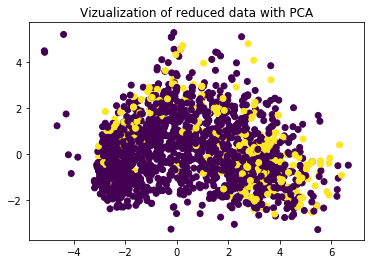

In [28]:
pca_vizualization(data_scl, target_labels)

Legend: yellow = Positive response // purple = Negative response

This is how the reduced dimension dataset looks like if we perform a Standard Scalling to our data. The standard scale makes the data have zero-mean, which is good for the convergence of the classification algorithms we'll be seeing further down this notebook.

As an alternative, we could use a Min-Max Scaller, which makes the PCA vizualization a little better.

This scatter plot can give us a notion that predicting if someone will accept the offer or not is very difficult. Even though the yellow dots are mostly on the 'border' of the purple dots, there are still many purple dots mixed in. Maybe if we had more features, there would be a slightly better separation between the two groups.

In [29]:
def kmeans_analysis(data):
    
    kmeans = KMeans(n_clusters = 5)
    kmeans.fit(data)
    
    return kmeans

In [30]:
kmeans = kmeans_analysis(data_scl)

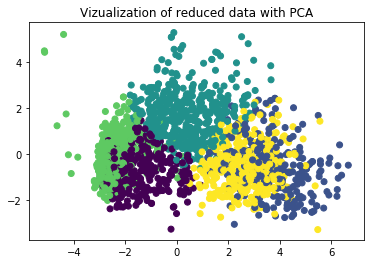

In [31]:
pca_vizualization(data_scl, kmeans.labels_)

We are using five clusters, so that we ca find the same amount of groups as the ones we defined earlier (fro A to E). Now we can define 5 datasets to see these clusters main characteristics

In [32]:
data0 = data.iloc()[kmeans.predict(data_scl) == 0]
data1 = data.iloc()[kmeans.predict(data_scl) == 1]
data2 = data.iloc()[kmeans.predict(data_scl) == 2]
data3 = data.iloc()[kmeans.predict(data_scl) == 3]
data4 = data.iloc()[kmeans.predict(data_scl) == 4]

In [33]:
data0.describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.00000,473.000000,473.000000,473.000000,473.000000,473.0,473.000000,473.000000,473.000000,473.000000
mean,1964.312896,45326.251609,0.608879,0.767442,41630.224101,52.742072,76.454545,5.997886,29.107822,7.530655,5.932347,15.071882,1.900634,2.249471,0.87315,3.887949,4.964059,0.054968,0.023256,0.0,0.004228,0.006342,0.004228,0.029598
std,10.309993,15486.431563,0.549736,0.492354,135.838905,28.991909,87.214659,10.073774,30.418393,11.188278,9.780411,16.880911,1.124015,1.345553,1.02137,1.626750,1.653443,0.228160,0.150874,0.0,0.064957,0.079471,0.064957,0.169656
min,1920.000000,13084.000000,0.000000,0.000000,41151.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1956.000000,36283.000000,0.000000,0.000000,41534.000000,28.000000,18.000000,0.000000,8.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.00000,3.000000,4.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1965.000000,44794.000000,1.000000,1.000000,41662.000000,54.000000,39.000000,2.000000,17.000000,3.000000,2.000000,9.000000,2.000000,2.000000,1.00000,3.000000,5.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,1973.000000,52247.251354,1.000000,1.000000,41742.000000,80.000000,111.000000,7.000000,43.000000,10.000000,7.000000,20.000000,2.000000,3.000000,1.00000,4.000000,6.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1989.000000,162397.000000,2.000000,2.000000,41819.000000,99.000000,734.000000,70.000000,168.000000,72.000000,67.000000,96.000000,7.000000,8.000000,6.00000,10.000000,8.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [34]:
data1.describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.00000
mean,1969.814286,73962.699122,0.057143,0.292857,41440.225000,47.671429,520.871429,101.928571,414.560714,124.910714,104.328571,95.710714,1.503571,5.782143,5.417857,8.507143,3.103571,0.075000,0.064286,0.185714,0.182143,0.007143,0.010714,0.22500
std,12.633281,11387.330432,0.247465,0.478894,205.213071,28.969009,266.197432,50.096200,229.878361,65.989702,52.284847,64.862622,1.157795,2.821900,2.335721,2.887363,1.833574,0.263863,0.245700,0.389572,0.386653,0.084364,0.103138,0.41833
min,1920.000000,32632.000000,0.000000,0.000000,41123.000000,0.000000,5.000000,0.000000,3.000000,0.000000,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1961.000000,67325.750000,0.000000,0.000000,41265.000000,25.000000,311.000000,63.000000,220.250000,72.000000,63.250000,40.000000,1.000000,4.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1971.000000,74389.000000,0.000000,0.000000,41416.000000,47.000000,493.500000,105.000000,389.000000,121.000000,104.000000,80.000000,1.000000,5.000000,5.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1979.000000,80959.500000,0.000000,1.000000,41628.000000,70.250000,709.500000,138.000000,560.500000,179.000000,143.000000,135.250000,2.000000,7.000000,7.000000,11.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1993.000000,113734.000000,2.000000,2.000000,41818.000000,99.000000,1259.000000,199.000000,984.000000,259.000000,263.000000,362.000000,7.000000,27.000000,11.000000,13.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [35]:
data2.describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,1965.110220,55800.711937,0.316633,0.903808,41369.973948,47.192385,469.190381,19.062124,127.420842,25.104208,19.915832,63.729459,4.250501,6.649299,2.871743,7.539078,6.352705,0.080160,0.146293,0.020040,0.032064,0.022044,0.006012,0.160321
std,9.896141,10848.585506,0.498939,0.446726,180.666229,28.361604,289.878914,23.876316,89.425381,30.548815,26.730113,55.905444,2.355753,2.503663,1.857251,2.659373,1.582994,0.271814,0.353754,0.140278,0.176347,0.146974,0.077381,0.367271
min,1943.000000,4428.000000,0.000000,0.000000,41120.000000,0.000000,7.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1956.000000,49350.000000,0.000000,1.000000,41218.000000,23.500000,243.500000,3.000000,65.000000,4.000000,3.000000,22.500000,3.000000,5.000000,2.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1965.000000,56337.000000,0.000000,1.000000,41338.000000,48.000000,400.000000,10.000000,107.000000,13.000000,10.000000,43.000000,4.000000,6.000000,2.000000,7.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1973.000000,63693.000000,1.000000,1.000000,41488.000000,70.000000,630.000000,25.000000,163.500000,37.000000,26.000000,92.000000,5.000000,8.000000,4.000000,9.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1992.000000,86358.000000,2.000000,2.000000,41819.000000,99.000000,1462.000000,142.000000,650.000000,223.000000,157.000000,321.000000,15.000000,25.000000,11.000000,13.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
data3.describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.0,608.000000,608.0,608.000000,608.000000
mean,1976.330592,29081.852396,0.847039,0.248355,41413.925987,47.192434,28.710526,5.284539,21.708882,7.917763,5.476974,15.904605,2.052632,2.080592,0.440789,2.968750,7.309211,0.078947,0.008224,0.0,0.001645,0.0,0.016447,0.125000
std,9.010204,10087.508848,0.457006,0.447395,184.607967,28.838941,39.645942,7.689375,22.768423,12.653921,7.953290,20.273276,1.491500,1.258285,0.683855,0.913388,1.749497,0.269879,0.090385,0.0,0.040555,0.0,0.127293,0.330991
min,1947.000000,1730.000000,0.000000,0.000000,41122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,1971.000000,22263.000000,1.000000,0.000000,41267.000000,22.750000,5.000000,1.000000,7.750000,2.000000,1.000000,4.000000,1.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,1977.000000,29638.000000,1.000000,0.000000,41395.000000,46.000000,13.000000,3.000000,14.000000,4.000000,3.000000,10.000000,2.000000,2.000000,0.000000,3.000000,7.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
75%,1983.000000,36305.000000,1.000000,0.000000,41550.000000,72.000000,36.000000,6.000000,25.000000,11.000000,7.000000,20.000000,3.000000,3.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
max,1996.000000,54162.000000,2.000000,2.000000,41813.000000,99.000000,308.000000,65.000000,137.000000,179.000000,78.000000,262.000000,15.000000,8.000000,5.000000,8.000000,20.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000


In [37]:
data4.describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1966.647368,76163.112511,0.047368,0.228947,41486.560526,51.231579,650.597368,38.986842,440.371053,74.155263,40.355263,61.078947,1.365789,4.957895,6.136842,8.373684,2.836842,0.073684,0.157895,0.265789,0.194737,0.036842,0.007895,0.265789
std,13.370975,15481.093166,0.212706,0.433071,197.064390,29.474000,342.695490,29.137149,264.054617,55.381046,30.589849,52.623059,1.412492,2.127423,3.193366,2.985867,1.729676,0.261601,0.365123,0.442335,0.396520,0.188622,0.088618,0.442335
min,1941.000000,2447.000000,0.000000,0.000000,41121.000000,0.000000,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1955.000000,69094.500000,0.000000,0.000000,41329.250000,24.000000,388.750000,20.000000,247.250000,32.000000,18.000000,22.750000,1.000000,3.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1965.000000,75774.000000,0.000000,0.000000,41504.000000,54.000000,590.500000,31.000000,400.000000,62.500000,35.000000,43.500000,1.000000,5.000000,6.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,81737.250000,0.000000,0.000000,41653.250000,76.250000,919.000000,53.250000,573.000000,104.000000,56.000000,84.000000,1.000000,6.000000,8.000000,11.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1995.000000,250000.000000,1.000000,2.000000,41818.000000,99.000000,1493.000000,169.000000,1725.000000,258.000000,182.000000,227.000000,15.000000,11.000000,28.000000,13.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Lets try to see what we can learn from these K-Means generated groups;

$\bullet$ Data1: This is the most notably different group. This group would be a general low income group. They make more deals purchases on average than the other groups. They also buy a much smaller amount. Their birthdates are higher (which means they are younger) and they actually do make more webvisists per month, even though they don't make as many web purchases on average.
They are more likely to have kids

$\bullet$ Data2: The 'middle class' group. They are welthier overall and don't usually have kids. They are also younger on average but not as much as the Data1 group. They make bigger purchases, spending a lot on wine and meat. They were one of the groups that gave more positive responses to the campaign offer, alongside with Data4 group. They have a good history of accepting previous offers aswell.

$\bullet$ Data4: A middle-high class group. They buy large amounts of products and are older on average. They don't have many kids or teenagers at home overall, and they really like using the catalog for purchasing. They have a bigger recency time on average and are also part of the 'loyal' customer base, having accepted previous offers in the past and accepting this campaigns offer aswell. Notice that they were the ones that accepted camapingn 5 the most.

$\bullet$ Data0: An older, low-medium income group. They don't buy big amounts of products and have teenagers at home. They are the ones that made web purchases the most, probabbly due to having teenagers at home, who use the companys services for them. They still buy big amounts of expensive products despite the lower average income.

$\bullet$ Data3: The overall older group. They are likely to have kids at home for some reason and they also have teenagers. They have high recency, which means they don't use the companys service as often as th other groups. They are low-income, but not as much as the Data1 group, which leads us to believe that Data1 group is mostly composed of students or recently graduated people. This group does not buy large amounts overall, and don't take campaign offers as much as the other groups do.

It is interesting to compare the groups we determined with the groups that were determined by K-Means. Doing this we were able to see that some of our prior conclusions were somewhat coherent with what the algorithm found. Some of the K-Means groups above are practically the same as the ones we defined earlier, which means we are probably going in a good direction on this user base segmentation.

# 5. Prediction Models

Finally we can begin making some predictions about the users responses to the current campaign. Nowadays the best prediction models are machine learning models, such as Logistic Regression and the Multilayered Perceptron. The advantage of these models is that they are able to 'figure out by themselves' the most important characteristics in our dataset to determine if the users response will be positive or negative. The other main advantage is that we don't really have to implement these algorithms (even though I already have); they are available in python libraries such as SkLearn, Keras, Pytorch and many others.

We will be using SkLearn's SVMClassifier (which is basically an enhanced version of logistic regression) with Stochastic Gradient Descent (an optimization algorithm) and the MLPClassifier, which lets us build a simple Neural Network model.

# 5.1. Feature Importance

Before moving on with the classification, lets first dive a bit into feature importance. When training a classifier, it is possible to extract information on what features are the most important to determining if a given example will give a positive response (1) or a negative response(0). Using feature importance we can do one more sanity check on the user base segmentation and also decide what features to input into the classifier, so as to speed up convergence (although this latter use of feature importance is not very important in our scenario).

In [38]:
def feature_importance_analysis(classifier, data):

    importance = classifier.coef_[0]

    plt.figure('Feature Importances', figsize = (12,8))
    plt.bar([list(data.head())[i] for i in range(len(importance))], importance)
    ax = plt.gca()
    plt.setp(ax.get_xticklabels(), rotation = 'vertical')
    plt.title('Feature Importance Bar Chart')
    plt.show()

# 5.2 SVM with SGD

In [39]:
def prediction_model_1(X, y):

    # Predicts whether a user, given their data, is more or less likely to
    # buy/respond to the offer.
    # This can be done with a simple support vector machine algorithm,
    # with Stochastic Gradient Descent, which classifies binary data lineary.
    
    # Hinge loss is the same as saying it will use a linear SVM
    clf = SGDClassifier(loss = 'hinge', max_iter = 1000, alpha = 0.01,
                        class_weight = 'balanced', tol = 1e-5)
    clf.fit(X,y)

    feature_importance_analysis(clf, X)

    return clf

In [40]:
# Firstly we have to get the data and divide it into dev and training set

X = data_scl.copy()
y = target_labels.copy()

X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size = 0.2)

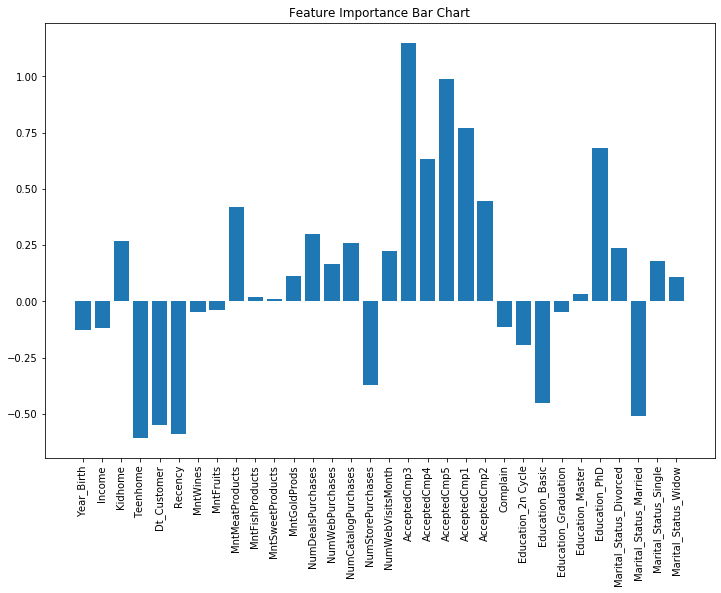

In [41]:
predictor1 = prediction_model_1(X_train, y_train)

Positive feature importance means that the feature was important to decide that the response would be positive (1), while negative values mean that that feature was important to decide that the response would be negative (0).

We can see that, as expected from previous analysis, having accepted previous offers was very important to decide that the person would accept the current offer. The same can be said about recency. Apparently income was not as important as we had previously imagined. It is also possible to notice that having teenagers at home is related to not accepting the offers. Also, apparently the level of education also meant something to the algorithm.

In [42]:
# Making predictions on the training set
y_pred_train = predictor1.predict(X_train)

In [43]:
print(classification_report(y_train, y_pred_train, zero_division = 0))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1535
           1       0.42      0.84      0.56       257

    accuracy                           0.81      1792
   macro avg       0.70      0.82      0.72      1792
weighted avg       0.89      0.81      0.84      1792



In [44]:
# Making predictions on the dev set
y_pred_dev = predictor1.predict(X_dev)

In [45]:
print(classification_report(y_dev, y_pred_dev, zero_division = 0))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       371
           1       0.44      0.79      0.56        77

    accuracy                           0.79       448
   macro avg       0.69      0.79      0.71       448
weighted avg       0.86      0.79      0.81       448



These are not very good results. Even though the accuracy is at around 80% for the train and dev sets, the F1-score is not as good. Also, the algorithm seems to be really good at correctly classifying users who won't accept the offer, but it is really bad at deciding who will. This is not a lost cause, since, at least, we know who not to direct our campaign towards. There will be some unecessary losses, but at least there will be a profit.

Consider the following campaign simulation function:

In [55]:
def simulation_campaign(predictor, train_data, dev_data, train_labels, dev_labels, avg_cost, avg_gain):

    # In this simulation, the predictor is put to test on the train_data
    # and dev_data. Since there is not much data on the dev set, the test
    # will be done in the training aswell, but it is to be noted that the
    # predictions made on the training are unreliable due to overfitting.

    # Simulation on training data
    pred_labels = predictor.predict(train_data)

    pred_train_data = train_data[pred_labels == 1]
    true_train_labels = train_labels[pred_labels == 1]

    print('Estimations based on training data')
    total_cost = avg_cost * pred_train_data.shape[0]
    print(f'Estimated cost of campaign: {total_cost} MU')
    total_gains = avg_gain * true_train_labels[true_train_labels == 1].shape[0]
    print(f'Estimated gains of campaign: {total_gains} MU')
    print(f'Estimated profits of campaign: {total_gains - total_cost} MU')
    print(f'Estimated profit percentage: {(total_gains - total_cost)/total_cost:.2%}\n')

    # Simulation on dev data
    pred_labels = predictor.predict(dev_data)
    print(len(pred_labels[pred_labels == 1]))

    pred_dev_data = dev_data[pred_labels == 1]
    true_dev_labels = dev_labels[pred_labels == 1]

    print('Estimations based on dev data')
    total_cost = avg_cost * pred_dev_data.shape[0]
    print(f'Estimated cost of campaign: {total_cost} MU')
    total_gains = avg_gain * true_dev_labels[true_dev_labels == 1].shape[0]
    print(f'Estimated gains of campaign: {total_gains} MU')
    print(f'Estimated profits of campaign: {total_gains - total_cost} MU')
    print(f'Estimated profit percentage: {(total_gains - total_cost)/total_cost:.2%}\n')


In [56]:
# We can get information on average cost per user and average gain 
# from the start of this notebook. In fact, these values were in the Z columns
# that we removed previously.

# Average cost of campaign per customer (2240 total customers). Should be 3.0
avg_cost = 6720/2240
# Average gain from customers who accepted the offer (334 accepted). Should be 11.0
avg_gain = 3674/334

simulation_campaign(predictor1, X_train, X_dev, y_train, y_dev, avg_cost, avg_gain)

Estimations based on training data
Estimated cost of campaign: 1524.0 MU
Estimated gains of campaign: 2365.0 MU
Estimated profits of campaign: 841.0 MU
Estimated profit percentage: 55.18%

140
Estimations based on dev data
Estimated cost of campaign: 420.0 MU
Estimated gains of campaign: 671.0 MU
Estimated profits of campaign: 251.0 MU
Estimated profit percentage: 59.76%



We can see that this first predictor does it's job. But we can do much better, and have  more consistency in our predictions. Consider the following predictor:

In [57]:
def prediction_model_2(X, y):

    # Predicts whether a user, given their data, is more or less likely to
    # buy/respond to the offer.
    # This can be done with a slightly more complex algorithm,
    # a Multilayer Perceptron with Adam optimizer.

    clf = MLPClassifier(hidden_layer_sizes = (100,), activation = 'relu',
                        max_iter = 200, learning_rate_init = 0.005, tol = 1e-4, alpha = 1)
    clf.fit(X,y)


    return clf

In [58]:
predictor2 = prediction_model_2(X_train, y_train)

In [59]:
y_pred_train = predictor2.predict(X_train)

In [60]:
print(classification_report(y_train, y_pred_train, zero_division = 0))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1535
           1       0.89      0.61      0.72       257

    accuracy                           0.93      1792
   macro avg       0.91      0.80      0.84      1792
weighted avg       0.93      0.93      0.93      1792



In [61]:
y_pred_dev = predictor2.predict(X_dev)

In [62]:
print(classification_report(y_dev, y_pred_dev, zero_division = 0))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       371
           1       0.72      0.47      0.57        77

    accuracy                           0.88       448
   macro avg       0.81      0.71      0.75       448
weighted avg       0.87      0.88      0.87       448



We can see that the second model yields much better results, mainly on the training set. It is important that it at least knows who not to target. And it is even better that it knows a little more about who to target specifically. Lets put it to the test with the simulation:

In [63]:
simulation_campaign(predictor2, X_train, X_dev, y_train, y_dev, avg_cost, avg_gain)

Estimations based on training data
Estimated cost of campaign: 528.0 MU
Estimated gains of campaign: 1716.0 MU
Estimated profits of campaign: 1188.0 MU
Estimated profit percentage: 225.00%

50
Estimations based on dev data
Estimated cost of campaign: 150.0 MU
Estimated gains of campaign: 396.0 MU
Estimated profits of campaign: 246.0 MU
Estimated profit percentage: 164.00%



These results are way better than the previous model. We just have to remember to use the dev set results as the expected prediction in a real world scenario, since the model is almost always a more fitted to the training set. After playing a bit with regularization, we were able to generalize the model some more. However, the results were still good when using the default regularization value of 0.0001.

# Conclusion

With this we conclude this notebook/report on the mock dataset. We were able to explore the data to get a general insight on the user's behaviour, we created two possible user base segmentations and we created a classification model that can make profitable decisions. This notebook has comments that serve as a semi-business presentation, however, not a short one...